## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
#mouse_metadata
#study_results 


In [2]:
# Combine the data into a single dataset
merged_db = pd.merge(mouse_metadata,study_results, on= "Mouse ID", how="outer")

##Rename columns
merged_db.columns = ['Mouse_ID', 'RX_Regimen','Gender','Age_in_months','Weight_in_grams','TimePoint','TumorVolume_mm3', 'Metastatic_Sites']

# Display the data table for preview
merged_db

,Mouse_ID,RX_Regimen,Gender,Age_in_months,Weight_in_grams,TimePoint,TumorVolume_mm3,Metastatic_Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [112]:
##valdiating data types
merged_db.dtypes

Mouse_ID             object
RX_Regimen           object
Gender               object
Age_in_months         int64
Weight_in_grams       int64
TimePoint             int64
TumorVolume_mm3     float64
Metastatic_Sites      int64
dtype: object

In [113]:
merged_db.groupby("RX_Regimen")
merged_db

,Mouse_ID,RX_Regimen,Gender,Age_in_months,Weight_in_grams,TimePoint,TumorVolume_mm3,Metastatic_Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [114]:
merged_db.count()

Mouse_ID            1893
RX_Regimen          1893
Gender              1893
Age_in_months       1893
Weight_in_grams     1893
TimePoint           1893
TumorVolume_mm3     1893
Metastatic_Sites    1893
dtype: int64

In [115]:
# Checking the number of mice
merged_db['Mouse_ID'].count()

1893

In [116]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
merged_db[merged_db.duplicated(['Mouse_ID' ,'TimePoint'], keep=False)]
merged_db

,Mouse_ID,RX_Regimen,Gender,Age_in_months,Weight_in_grams,TimePoint,TumorVolume_mm3,Metastatic_Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [117]:
# Optional: Get all the data for the duplicate mouse ID. 

merged_db[merged_db.duplicated(['Mouse_ID'], keep=False)]
merged_db

,Mouse_ID,RX_Regimen,Gender,Age_in_months,Weight_in_grams,TimePoint,TumorVolume_mm3,Metastatic_Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [118]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_db = merged_db.drop_duplicates(subset='Mouse_ID',keep='first')
clean_db


,Mouse_ID,RX_Regimen,Gender,Age_in_months,Weight_in_grams,TimePoint,TumorVolume_mm3,Metastatic_Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [119]:
# Checking the number of mice in the clean DataFrame.
clean_db['Mouse_ID'].count()

249

## Summary Statistics

In [120]:
# Validating the RX Treatments
regimen=clean_db['RX_Regimen'].unique()
regimen

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

In [121]:
# Generate a summary statistics table of mean, median, variance, standard deviation,and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function


means = clean_db.groupby('RX_Regimen').mean()['TumorVolume_mm3']
medians = clean_db.groupby('RX_Regimen').median()['TumorVolume_mm3']
variances = clean_db.groupby('RX_Regimen').var()['TumorVolume_mm3']
stdeviations = clean_db.groupby('RX_Regimen').std()['TumorVolume_mm3']
sems = clean_db.groupby('RX_Regimen').sem()['TumorVolume_mm3']

summary_table = pd.DataFrame({"Mean Tumor Volume":means,
                              "Median Tumor Volume":medians,
                              "Tumor Volume Variance":variances,
                              "Tumor Volume Std. Dev.":stdeviations,
                              "Tumor Volume Std. Err.":sems})
summary_table

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
RX_Regimen,,,,,
Capomulin,45.0,45.0,0.0,0.0,0.0
Ceftamin,45.0,45.0,0.0,0.0,0.0
Infubinol,45.0,45.0,0.0,0.0,0.0
Ketapril,45.0,45.0,0.0,0.0,0.0
Naftisol,45.0,45.0,0.0,0.0,0.0
Placebo,45.0,45.0,0.0,0.0,0.0
Propriva,45.0,45.0,0.0,0.0,0.0
Ramicane,45.0,45.0,0.0,0.0,0.0
Stelasyn,45.0,45.0,0.0,0.0,0.0


## Bar and Pie Charts

In [122]:
clean_db
clean_db.columns

Index(['Mouse_ID', 'RX_Regimen', 'Gender', 'Age_in_months', 'Weight_in_grams',
       'TimePoint', 'TumorVolume_mm3', 'Metastatic_Sites'],
      dtype='object')

In [123]:
mouse_tx = clean_db.drop(columns=['Gender', 'Age_in_months', 'Weight_in_grams',
       'TimePoint','TumorVolume_mm3','Metastatic_Sites'])
mouse_tx

,Mouse_ID,RX_Regimen
0,k403,Ramicane
10,s185,Capomulin
20,x401,Capomulin
30,m601,Capomulin
40,g791,Ramicane
...,...,...
1858,z314,Stelasyn
1860,z435,Propriva
1863,z581,Infubinol
1873,z795,Naftisol


In [124]:
counts = mouse_tx["RX_Regimen"].value_counts()
counts

Zoniferol    25
Infubinol    25
Capomulin    25
Placebo      25
Propriva     25
Naftisol     25
Ceftamin     25
Ketapril     25
Ramicane     25
Stelasyn     24
Name: RX_Regimen, dtype: int64

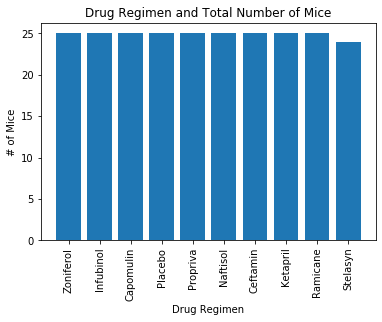

In [125]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

plt.bar(counts.index.values, counts.values)
plt.xticks(rotation =90)
plt.title("Drug Regimen and Total Number of Mice")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Mice")
plt.show()

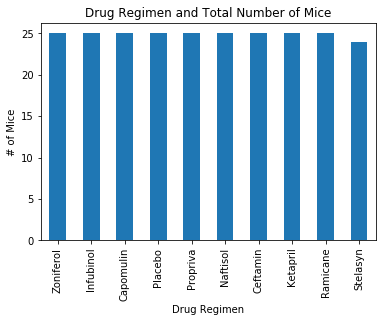

In [126]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
counts.plot(kind="bar")
plt.title("Drug Regimen and Total Number of Mice")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Mice")
plt.show()

In [127]:
# Use DataFrame.plot() in order to create a bar chart of the data
gender_tx = clean_db.drop(columns=['Mouse_ID','Age_in_months','Weight_in_grams',
       'TimePoint','TumorVolume_mm3','Metastatic_Sites'])
gender_tx


,RX_Regimen,Gender
0,Ramicane,Male
10,Capomulin,Female
20,Capomulin,Female
30,Capomulin,Male
40,Ramicane,Male
...,...,...
1858,Stelasyn,Female
1860,Propriva,Female
1863,Infubinol,Female
1873,Naftisol,Female


In [128]:
gender_counts = gender_tx["Gender"].value_counts()
gender_counts.head()

Male      125
Female    124
Name: Gender, dtype: int64

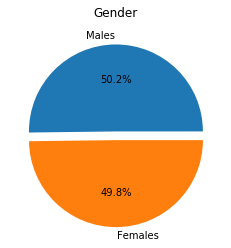

In [129]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
labels = 'Males', 'Females'
explode= (0,0.1)
plt.pie(gender_counts, explode=explode,labels = labels,autopct='%1.1f%%')
plt.title("Gender")
plt.show()

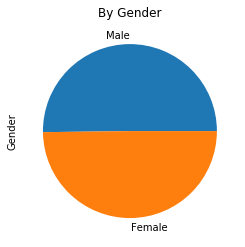

In [130]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_counts.plot(kind="pie", title="By Gender")


## Quartiles, Outliers and Boxplots

In [131]:
clean_db                                

,Mouse_ID,RX_Regimen,Gender,Age_in_months,Weight_in_grams,TimePoint,TumorVolume_mm3,Metastatic_Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [132]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens: 
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
mouseid_grouped = merged_db.groupby("Mouse_ID").max()
grouped_index = mouseid_grouped.reset_index()
mouse = grouped_index[["Mouse_ID", "TimePoint"]]
mouse

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
grouped_df = pd.merge(mouse, merged_db, on =["Mouse_ID", "TimePoint"], how="left")
grouped_df

tumorVolume= grouped_df.loc[(grouped_df["RX_Regimen"] == "Capomulin") | 
                                      (grouped_df["RX_Regimen"] == "Ramicane") |
                                      (grouped_df["RX_Regimen"] == "Infubinol") |
                                      (grouped_df["RX_Regimen"] == "Ceftamin")]
tumorVolume

,Mouse_ID,TimePoint,RX_Regimen,Gender,Age_in_months,Weight_in_grams,TumorVolume_mm3,Metastatic_Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
3,a275,45,Ceftamin,Female,20,28,62.999356,3
6,a411,45,Ramicane,Male,3,22,38.407618,1
7,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
239,y769,45,Ceftamin,Female,6,27,68.594745,4
240,y793,45,Capomulin,Male,17,17,31.896238,2
241,y865,45,Ceftamin,Male,23,26,64.729837,3
245,z578,45,Ramicane,Male,11,16,30.638696,0


In [133]:
# Put treatments into a list for for loop (and later for plot labels)
##for x in range(len(tumorVolume(["RX_Regimen"])):
##print([x])
treatment_list=clean_db["RX_Regimen"].unique()
for x in treatment_list:
    print(x)

Ramicane
Capomulin
Infubinol
Placebo
Ceftamin
Stelasyn
Zoniferol
Ketapril
Propriva
Naftisol


In [134]:
# Create empty list to fill with tumor vol data (for plotting)


In [135]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
tumor = tumorVolume["TumorVolume_mm3"]

quartiles = round(tumor.quantile([.25,.5,.75]))
lowerq = round(quartiles[0.25])
upperq = round(quartiles[0.75])
iqr = round(upperq-lowerq)

print(f"The lower quartile of Tumor Size (mm3) is: {lowerq}")
print(f"The upper quartile of Tumor Size (mm3) is: {upperq}")
print(f"The interquartile range of Tumor Size (mm3) is: {iqr}")
print(f"The the median of Tumor Size (mm3) is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

The lower quartile of Tumor Size (mm3) is: 37.0
The upper quartile of Tumor Size (mm3) is: 60.0
The interquartile range of Tumor Size (mm3) is: 23.0
The the median of Tumor Size (mm3) is: 45.0 
Values below 2.5 could be outliers.
Values above 94.5 could be outliers.


In [136]:
tumor.value_counts()

45.000000    4
32.377357    1
37.311236    1
47.685963    1
47.784682    1
            ..
33.397653    1
50.005138    1
56.057749    1
40.658124    1
64.299830    1
Name: TumorVolume_mm3, Length: 97, dtype: int64

In [137]:
mouse_tumor = tumorVolume[["Mouse_ID","RX_Regimen","TumorVolume_mm3"]]
mouse_tumor


,Mouse_ID,RX_Regimen,TumorVolume_mm3
0,a203,Infubinol,67.973419
1,a251,Infubinol,65.525743
3,a275,Ceftamin,62.999356
6,a411,Ramicane,38.407618
7,a444,Ramicane,43.047543
...,...,...,...
239,y769,Ceftamin,68.594745
240,y793,Capomulin,31.896238
241,y865,Ceftamin,64.729837
245,z578,Ramicane,30.638696


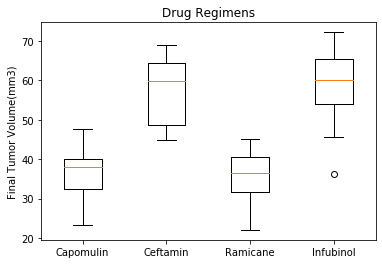

In [138]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


capomulin = mouse_tumor.loc[mouse_tumor["RX_Regimen"] == "Capomulin"]["TumorVolume_mm3"]
ceftamin = mouse_tumor.loc[mouse_tumor["RX_Regimen"] == "Ceftamin"]["TumorVolume_mm3"]
ramicane = mouse_tumor.loc[mouse_tumor["RX_Regimen"] == "Ramicane"]["TumorVolume_mm3"]
infubinol = mouse_tumor.loc[mouse_tumor["RX_Regimen"] == "Infubinol"]["TumorVolume_mm3"]
labels = ["Capomulin", "Ceftamin", "Ramicane", "Infubinol"]
plt.boxplot([capomulin, ceftamin, ramicane,infubinol],labels=labels)
#labels = ["Capomulin", "Ceftamin", "Ramicane", "Infubinol"]
plt.title("Drug Regimens")
plt.ylabel("Final Tumor Volume(mm3)")
plt.show()

## Line and Scatter Plots

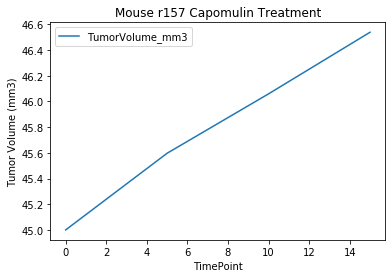

In [139]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
time_point = merged_db[["Mouse_ID", "RX_Regimen", "TimePoint","TumorVolume_mm3"]]
time_point

capomulinRx = time_point.loc[(time_point["RX_Regimen"]=="Capomulin") & (time_point["Mouse_ID"]=="r157")]
capomulinRx
                        
line_graph = capomulinRx[["TimePoint", "TumorVolume_mm3"]]
line_graphset = line_graph.set_index("TimePoint")
linegraph = line_graphset.plot.line(title="Mouse r157 Capomulin Treatment")

plt.ylabel("Tumor Volume (mm3)")
plt.show()

In [140]:
## Getting the data to set up next step( Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen)


weight = merged_db[["Mouse_ID", "RX_Regimen","Weight_in_grams", "TimePoint","TumorVolume_mm3"]]


weight_RXCampomulin = weight.loc[(weight["RX_Regimen"]=="Capomulin")] 
weight_RXCampomulin.reset_index()




,index,Mouse_ID,RX_Regimen,Weight_in_grams,TimePoint,TumorVolume_mm3
0,10,s185,Capomulin,17,0,45.000000
1,11,s185,Capomulin,17,5,43.878496
2,12,s185,Capomulin,17,10,37.614948
3,13,s185,Capomulin,17,15,38.177232
4,14,s185,Capomulin,17,20,36.866876
...,...,...,...,...,...,...
225,440,i557,Capomulin,24,45,47.685963
226,1452,r157,Capomulin,25,0,45.000000
227,1453,r157,Capomulin,25,5,45.597064
228,1454,r157,Capomulin,25,10,46.059608


In [141]:
grouped_df =  weight_RXCampomulin.groupby("Mouse_ID").mean()
grouped_df

,Weight_in_grams,TimePoint,TumorVolume_mm3
Mouse_ID,,,
b128,22.0,22.5,41.963636
b742,21.0,22.5,40.083699
f966,17.0,10.0,36.505973
g288,19.0,22.5,41.990097
g316,22.0,22.5,44.613344
i557,24.0,22.5,44.805810
i738,20.0,22.5,39.141053
j119,23.0,22.5,44.465236
j246,21.0,17.5,43.216925


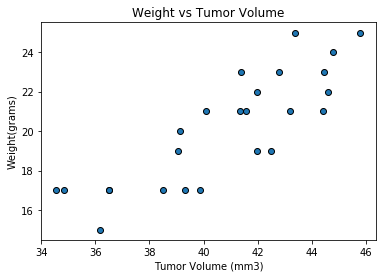

In [142]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

plt.scatter(grouped_df.TumorVolume_mm3,grouped_df.Weight_in_grams,edgecolors="black")
plt.title("Weight vs Tumor Volume")
plt.xlabel("Tumor Volume (mm3)")
plt.ylabel("Weight(grams)")                  
plt.show()

In [143]:
weight_RXCampomulin

,Mouse_ID,RX_Regimen,Weight_in_grams,TimePoint,TumorVolume_mm3
10,s185,Capomulin,17,0,45.000000
11,s185,Capomulin,17,5,43.878496
12,s185,Capomulin,17,10,37.614948
13,s185,Capomulin,17,15,38.177232
14,s185,Capomulin,17,20,36.866876
...,...,...,...,...,...
440,i557,Capomulin,24,45,47.685963
1452,r157,Capomulin,25,0,45.000000
1453,r157,Capomulin,25,5,45.597064
1454,r157,Capomulin,25,10,46.059608


## Correlation and Regression

In [150]:
# Calculate the correlation coefficient and linear  model for mregressionouse weight and average tumor volume for the Capomulin regimen

capomulin_wt = grouped_df.Weight_in_grams
capomulin_volume = grouped_df.TumorVolume_mm3
print(f"The correlation coefficient for weight and tumor volum is {round(st.pearsonr(capomulin_wt,capomulin_volume)[0],2)}")


The correlation coefficient for weight and tumor volum is 0.84


The r-squared is: 0.7088568047708717


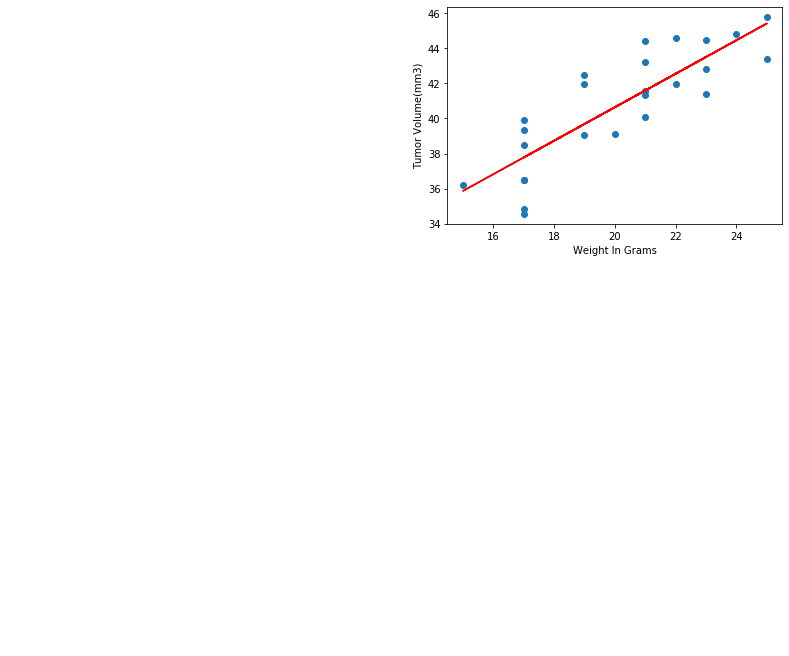

In [159]:
x_values = capomulin_wt
y_values = capomulin_volume
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,10),fontsize=17,color="orange")
plt.xlabel('Weight In Grams')
plt.ylabel('Tumor Volume(mm3)')
print(f"The r-squared is: {rvalue**2}")
plt.show()